In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import files
import pandas as pd
import io


# Upload file manually
uploaded =files.upload()

Saving Restaurant_Reviews.tsv to Restaurant_Reviews.tsv


In [ ]:
# Read the dataset from the uploaded file
data = pd.read_csv(io.BytesIO(uploaded['Restaurant_Reviews.tsv']), delimiter="\t", quoting=3)

# Print dataset info
print(data.info())
print(data.head())  # Show first 5 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB
None
                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1


In [ ]:
corpus = []
ps = PorterStemmer()

for i in range(len(data)):  # Loop through all reviews
    review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=data['Review'][i])
    review = review.lower()
    review_words = review.split()
    review_words = [word for word in review_words if word not in set(stopwords.words('english'))]
    review_words = [ps.stem(word) for word in review_words]  # Stemming
    corpus.append(' '.join(review_words))

# Print first 5 processed reviews
print(corpus[:5])

['wow love place', 'crust good', 'tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price']


In [ ]:
cv = CountVectorizer(max_features=1500)  # Use Bag of Words model
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 1].values  # Extract labels (0: Negative, 1: Positive)

print("Feature matrix shape:", X.shape)  # Check shape of feature matrix

Feature matrix shape: (1000, 1500)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:",X_test.shape)

Training Set Shape: (800, 1500)
Testing Set Shape: (200, 1500)


In [ ]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
print("Model training complete!")

Model training complete!


In [ ]:
y_pred = classifier.predict(X_test)
print("Predictions complete!")

Predictions complete!


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("--------- SCORES ---------")
print(f"Accuracy Score: {accuracy * 100:.2f}%")
print(f"Precision Score: {precision * 100:.2f}%")
print(f"Recall Score: {recall * 100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")

--------- SCORES ---------
Accuracy Score: 76.50%
Precision Score: 76.42%
Recall Score: 78.64%
F1 Score: 77.51%


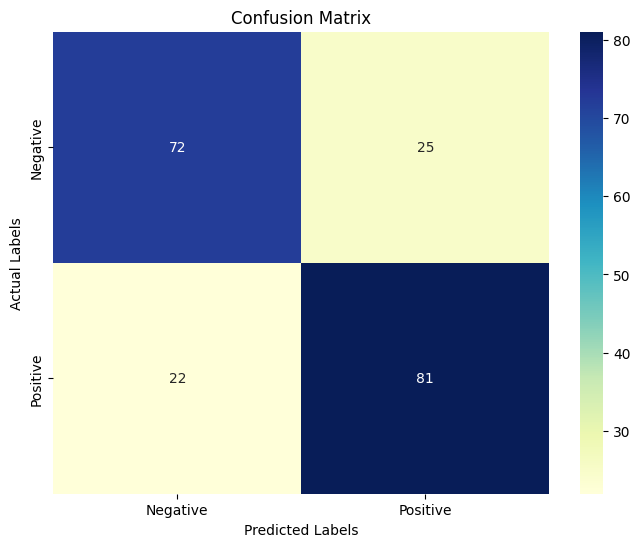

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
best_accuracy = 0.0
best_alpha = 0.0

for i in np.arange(0.1, 1.1, 0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print(f"Accuracy Score for alpha={i:.1f}: {score * 100:.2f}%")

    if score > best_accuracy:
        best_accuracy = score
        best_alpha = i

print(f"\nBest Accuracy: {best_accuracy * 100:.2f}% at alpha={best_alpha:.1f}")

Accuracy Score for alpha=0.1: 78.00%
Accuracy Score for alpha=0.2: 78.50%
Accuracy Score for alpha=0.3: 78.00%
Accuracy Score for alpha=0.4: 78.50%
Accuracy Score for alpha=0.5: 77.50%
Accuracy Score for alpha=0.6: 77.50%
Accuracy Score for alpha=0.7: 77.50%
Accuracy Score for alpha=0.8: 77.00%
Accuracy Score for alpha=0.9: 76.50%
Accuracy Score for alpha=1.0: 76.50%

Best Accuracy: 78.50% at alpha=0.2


In [ ]:
classifier = MultinomialNB(alpha=best_alpha)
classifier.fit(X_train, y_train)
print(f"Model retrained with alpha={best_alpha:.1f}")

Model retrained with alpha=0.2


In [ ]:
def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if word not in set(stopwords.words('english'))]
    sample_review_words = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(sample_review_words)

    temp = cv.transform([final_review]).toarray()
    return classifier.predict(temp)[0]

In [ ]:
while True:
    user_review = input("\nEnter a review (or type 'exit' to quit): ")
    if user_review.lower() == 'exit':
        break
    sentiment = "Positive" if predict_sentiment(user_review) else "Negative"
    print(f"Predicted Sentiment:{sentiment}")


Enter a review (or type 'exit' to quit): food is good
Predicted Sentiment:Positive

Enter a review (or type 'exit' to quit): food is bad
Predicted Sentiment:Negative

Enter a review (or type 'exit' to quit): exit
